In [1]:
!wget https://github.com/GuiFay/Automatic-Literature-Mapping-Selection/raw/main/dataset_articles.xlsx
!wget https://github.com/GuiFay/Automatic-Literature-Mapping-Selection/raw/main/scimagojr%202022.csv

--2024-04-19 12:15:18--  https://github.com/GuiFay/Automatic-Literature-Mapping-Selection/raw/main/dataset_articles.xlsx
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/GuiFay/Automatic-Literature-Mapping-Selection/main/dataset_articles.xlsx [following]
--2024-04-19 12:15:18--  https://raw.githubusercontent.com/GuiFay/Automatic-Literature-Mapping-Selection/main/dataset_articles.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13510211 (13M) [application/octet-stream]
Saving to: ‘dataset_articles.xlsx’

dataset_articles.xl 100%[===================>]  12.88M  49.0MB/s    in 0.3s    

2024-04-1

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
import re

# Read the CSV file
tabela_artigos = pd.read_excel('/content/dataset_articles.xlsx')

tabela_artigos

,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,Book Series Title,Book Series Subtitle,Language,Document Type,Conference Title,Conference Date,Conference Location,Conference Sponsor,Conference Host,Author Keywords,Keywords Plus,Abstract,Addresses,Affiliations,Reprint Addresses,Email Addresses,Researcher Ids,ORCIDs,Funding Orgs,Funding Name Preferred,Funding Text,Cited References,Cited Reference Count,"Times Cited, WoS Core","Times Cited, All Databases",180 Day Usage Count,Since 2013 Usage Count,Publisher,Publisher City,Publisher Address,ISSN,eISSN,ISBN,Journal Abbreviation,Journal ISO Abbreviation,Publication Date,Publication Year,Volume,Issue,Part Number,Supplement,Special Issue,Meeting Abstract,Start Page,End Page,Article Number,DOI,DOI Link,Book DOI,Early Access Date,Number of Pages,WoS Categories,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record,Category
0,J,"Zhang, JF; Liu, JX",NaN,NaN,NaN,"Zhang, Junfeng; Liu, Jianxu",NaN,NaN,Energy efficiency and its influencing factors:...,ENERGY SOURCES PART A-RECOVERY UTILIZATION AND...,NaN,NaN,English,Article; Early Access,NaN,NaN,NaN,NaN,NaN,Energy efficiency; Super-SBM model; manufactur...,TOTAL-FACTOR PRODUCTIVITY; SLACKS-BASED MEASUR...,Analysis of the energy efficiency and producti...,"[Zhang, Junfeng; Liu, Jianxu] Shandong Univ Fi...",Shandong University of Finance & Economics; Ch...,"Liu, JX (autor correspondente), Shandong Univ ...",liujianxu1984@163.com,"Liu, Jianxu/ABI-1983-2020",", JIANXU/0000-0002-2128-6015",National Natural Science Foundation of China [...,National Natural Science Foundation of China(N...,This study is supported by National Natural Sc...,NaN,49,5,5,0,32,TAYLOR & FRANCIS INC,PHILADELPHIA,"530 WALNUT STREET, STE 850, PHILADELPHIA, PA 1...",1556-7036,1556-7230,NaN,ENERG SOURCE PART A,Energy Sources Part A-Recovery Util. Environ. ...,2020 JUL 16,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.1080/15567036.2020.1792590,http://dx.doi.org/10.1080/15567036.2020.1792590,NaN,JUL 2020,16,"Energy & Fuels; Engineering, Chemical; Environ...",Science Citation Index Expanded (SCI-EXPANDED),Energy & Fuels; Engineering; Environmental Sci...,MK8GU,NaN,NaN,NaN,NaN,2023-07-17,WOS:000549021200001,View Full Record in Web of Science,Efficiency
1,J,"Cao, LZ; Qi, ZY; Ren, JX",NaN,NaN,NaN,"Cao, Lizhan; Qi, Zhongying; Ren, Junxia",NaN,NaN,China's Industrial Total-Factor Energy Product...,SUSTAINABILITY,NaN,NaN,English,Article,NaN,NaN,NaN,NaN,NaN,total-factor energy efficiency; energy product...,MEASURING GREEN PRODUCTIVITY; EFFICIENCY CHANG...,"Under the concept of metafrontier, technology ...","[Cao, Lizhan; Qi, Zhongying; Ren, Junxia] Harb...",Harbin Institute of Technology,"Cao, LZ; Qi, ZY (autor correspondente), Harbin...",lzhcao@hit.edu.cn; qizy@hit.edu.cn; renjunxia@...,NaN,NaN,National Natural Science Foundation of China [...,National Natural Science Foundation of China(N...,This paper is supported by the National Natura...,NaN,59,8,8,3,61,MDPI AG,BASEL,"ST ALBAN-ANLAGE 66, CH-4052 BASEL, SWITZERLAND",2071-1050,NaN,NaN,SUSTAINABILITY-BASEL,Sustainability,AUG,2017,9,8,NaN,NaN,NaN,NaN,NaN,NaN,1384,10.3390/su9081384,http://dx.doi.org/10.3390/su9081384,NaN,NaN,22,Green & Sustainable Science & Technology; Envi...,Science Citation Index Expanded (SCI-EXPANDED)...,Science & Technology - Other Topics; Environme...,FF3YT,NaN,"gold, Green Submitted",NaN,NaN,2023-07-17,WOS:000408861800099,View Full Record in Web of Science,Efficiency
2,J,"Borozan, D; Starcevic, DP",NaN,NaN,NaN,"Borozan, Djula; Starcevic, Dubravka Pekanov",NaN,NaN,Analysing the Pattern of Productivity Change i...,SUSTAINABILITY,NaN,NaN,English,Article,NaN,NaN,NaN,NaN,NaN,productivity changes; technical efficiency; en...,TECHNICAL EFFICIENCY; ELECTRICITY DISTRIBUTION...,For an industry to succeed 

In [22]:
tabela_artigos['ISSN'] = tabela_artigos['ISSN'].str.replace("-", "")
tabela_artigos['eISSN'] = tabela_artigos['eISSN'].str.replace("-", "")

tabela_artigos

,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,Book Series Title,Book Series Subtitle,Language,Document Type,Conference Title,Conference Date,Conference Location,Conference Sponsor,Conference Host,Author Keywords,Keywords Plus,Abstract,Addresses,Affiliations,Reprint Addresses,Email Addresses,Researcher Ids,ORCIDs,Funding Orgs,Funding Name Preferred,Funding Text,Cited References,Cited Reference Count,"Times Cited, WoS Core","Times Cited, All Databases",180 Day Usage Count,Since 2013 Usage Count,Publisher,Publisher City,Publisher Address,ISSN,eISSN,ISBN,Journal Abbreviation,Journal ISO Abbreviation,Publication Date,Publication Year,Volume,Issue,Part Number,Supplement,Special Issue,Meeting Abstract,Start Page,End Page,Article Number,DOI,DOI Link,Book DOI,Early Access Date,Number of Pages,WoS Categories,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record,Category
0,J,"Zhang, JF; Liu, JX",NaN,NaN,NaN,"Zhang, Junfeng; Liu, Jianxu",NaN,NaN,Energy efficiency and its influencing factors:...,ENERGY SOURCES PART A-RECOVERY UTILIZATION AND...,NaN,NaN,English,Article; Early Access,NaN,NaN,NaN,NaN,NaN,Energy efficiency; Super-SBM model; manufactur...,TOTAL-FACTOR PRODUCTIVITY; SLACKS-BASED MEASUR...,Analysis of the energy efficiency and producti...,"[Zhang, Junfeng; Liu, Jianxu] Shandong Univ Fi...",Shandong University of Finance & Economics; Ch...,"Liu, JX (autor correspondente), Shandong Univ ...",liujianxu1984@163.com,"Liu, Jianxu/ABI-1983-2020",", JIANXU/0000-0002-2128-6015",National Natural Science Foundation of China [...,National Natural Science Foundation of China(N...,This study is supported by National Natural Sc...,NaN,49,5,5,0,32,TAYLOR & FRANCIS INC,PHILADELPHIA,"530 WALNUT STREET, STE 850, PHILADELPHIA, PA 1...",15567036,15567230,NaN,ENERG SOURCE PART A,Energy Sources Part A-Recovery Util. Environ. ...,2020 JUL 16,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.1080/15567036.2020.1792590,http://dx.doi.org/10.1080/15567036.2020.1792590,NaN,JUL 2020,16,"Energy & Fuels; Engineering, Chemical; Environ...",Science Citation Index Expanded (SCI-EXPANDED),Energy & Fuels; Engineering; Environmental Sci...,MK8GU,NaN,NaN,NaN,NaN,2023-07-17,WOS:000549021200001,View Full Record in Web of Science,Efficiency
1,J,"Cao, LZ; Qi, ZY; Ren, JX",NaN,NaN,NaN,"Cao, Lizhan; Qi, Zhongying; Ren, Junxia",NaN,NaN,China's Industrial Total-Factor Energy Product...,SUSTAINABILITY,NaN,NaN,English,Article,NaN,NaN,NaN,NaN,NaN,total-factor energy efficiency; energy product...,MEASURING GREEN PRODUCTIVITY; EFFICIENCY CHANG...,"Under the concept of metafrontier, technology ...","[Cao, Lizhan; Qi, Zhongying; Ren, Junxia] Harb...",Harbin Institute of Technology,"Cao, LZ; Qi, ZY (autor correspondente), Harbin...",lzhcao@hit.edu.cn; qizy@hit.edu.cn; renjunxia@...,NaN,NaN,National Natural Science Foundation of China [...,National Natural Science Foundation of China(N...,This paper is supported by the National Natura...,NaN,59,8,8,3,61,MDPI AG,BASEL,"ST ALBAN-ANLAGE 66, CH-4052 BASEL, SWITZERLAND",20711050,NaN,NaN,SUSTAINABILITY-BASEL,Sustainability,AUG,2017,9,8,NaN,NaN,NaN,NaN,NaN,NaN,1384,10.3390/su9081384,http://dx.doi.org/10.3390/su9081384,NaN,NaN,22,Green & Sustainable Science & Technology; Envi...,Science Citation Index Expanded (SCI-EXPANDED)...,Science & Technology - Other Topics; Environme...,FF3YT,NaN,"gold, Green Submitted",NaN,NaN,2023-07-17,WOS:000408861800099,View Full Record in Web of Science,Efficiency
2,J,"Borozan, D; Starcevic, DP",NaN,NaN,NaN,"Borozan, Djula; Starcevic, Dubravka Pekanov",NaN,NaN,Analysing the Pattern of Productivity Change i...,SUSTAINABILITY,NaN,NaN,English,Article,NaN,NaN,NaN,NaN,NaN,productivity changes; technical efficiency; en...,TECHNICAL EFFICIENCY; ELECTRICITY DISTRIBUTION...,For an industry to succeed in 

In [23]:
# Read the excell file
tabela_notas = pd.read_csv('/content/scimagojr 2022.csv', encoding='utf-8', sep=';')

tabela_notas

,Rank,Sourceid,Title,Type,Issn,SJR,SJR Best Quartile,H index,Total Docs. (2022),Total Docs. (3years),Total Refs.,Total Cites (3years),Citable Docs. (3years),Cites / Doc. (2years),Ref. / Doc.,Country,Region,Publisher,Coverage,Categories,Areas
0,1,28773,Ca-A Cancer Journal for Clinicians,journal,"15424863, 00079235","86,091",Q1,198,44,118,4268,30318,85,"299,99","97,00",United States,Northern America,Wiley-Blackwell,1950-2022,Hematology (Q1); Oncology (Q1),Medicine
1,2,29431,Quarterly Journal of Economics,journal,"00335533, 15314650","36,730",Q1,292,36,122,2398,2141,122,"14,83","66,61",United Kingdom,Western Europe,Oxford University Press,1886-2022,Economics and Econometrics (Q1),"Economics, Econometrics and Finance"
2,3,20315,Nature Reviews Molecular Cell Biology,journal,"14710072, 14710080","34,201",Q1,485,121,328,10804,13331,156,"35,47","89,29",United Kingdom,Western Europe,Nature Publishing Group,2000-2022,Cell Biology (Q1); Molecular Biology (Q1),"Biochemistry, Genetics and Molecular Biology"
3,4,18434,Cell,journal,"00928674, 10974172","26,494",Q1,856,420,1637,27609,67791,1440,"43,80","65,74",United States,Northern America,Cell Press,1974-2022,"Biochemistry, Genetics and Molecular Biology (...","Biochemistry, Genetics and Molecular Biology"
4,5,15847,New England Journal of Medicine,journal,"00284793, 15334406","26,015",Q1,1130,1410,4561,14396,133956,1854,"33,93","10,21",United States,Northern America,Massachussetts Medical Society,1945-2022,Medicine (miscellaneous) (Q1),Medicine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27950,27951,21101091736,Worldwide Waste,journal,23997117,NaN,-,1,5,0,320,0,0,"0,00","64,00",United Kingdom,Western Europe,Web Portal Ubiquity Press,2022,Waste Management and Disposal,Environmental Science
27951,27952,17700156005,WSEAS Transactions on Heat and Mass Transfer (...,journal,17905044,NaN,-,10,24,0,593,0,0,"0,00","24,71",Greece,Western Europe,World Scientific and Engineering Academy and S...,"2009-2015, 2022",Condensed Matter Physics; Energy (miscellaneou...,Energy; Engineering; Physics and Astronomy
27952,27953,21100829466,Yearbook of Comparative Literature,journal,"19255772, 19255764",NaN,-,4,9,0,412,0,0,"0,00","45,78",Canada,Northern America,University of Toronto Press,"2009-2011, 2013-2017",Cultural Studies; History; Literature and Lite...,Arts and Humanities; Social Sciences
27953,27954,21100212328,Zbornik za Umetnostno Zgodovino,journal,"0351224X, 15803767",NaN,-,3,1,0,0,0,0,"0,00","0,00",Slovenia,Eastern Europe,Slovene Art History Society,2011-2018,History; Visual Arts and Performing Arts,Arts and Humanities


In [24]:
# Separar os dados em duas colunas
split_issn = tabela_notas['Issn'].str.split(',', n=1, expand=True)

# Create 'eISSN' and 'ISSN' columns based on the split values
tabela_notas['eISSN'] = split_issn[0]
tabela_notas['ISSN'] = split_issn[1]

# If there was no separator in a cell, 'ISSN' will be NaN. You can handle it by filling NaN with empty string ''
tabela_notas['ISSN'].fillna('', inplace=True)

# Substitui a vírgula pelo ponto na coluna 'Valor'
tabela_notas['SJR'] = tabela_notas['SJR'].str.replace(',', '.')
tabela_notas['SJR'].fillna(0, inplace=True)  # Substitui os NaNs por 0

# Converte a coluna 'SJR' para float
tabela_notas['SJR'] = tabela_notas['SJR'].astype(float)

tabela_notas

,Rank,Sourceid,Title,Type,Issn,SJR,SJR Best Quartile,H index,Total Docs. (2022),Total Docs. (3years),Total Refs.,Total Cites (3years),Citable Docs. (3years),Cites / Doc. (2years),Ref. / Doc.,Country,Region,Publisher,Coverage,Categories,Areas,eISSN,ISSN
0,1,28773,Ca-A Cancer Journal for Clinicians,journal,"15424863, 00079235",86.091,Q1,198,44,118,4268,30318,85,"299,99","97,00",United States,Northern America,Wiley-Blackwell,1950-2022,Hematology (Q1); Oncology (Q1),Medicine,15424863,00079235
1,2,29431,Quarterly Journal of Economics,journal,"00335533, 15314650",36.730,Q1,292,36,122,2398,2141,122,"14,83","66,61",United Kingdom,Western Europe,Oxford University Press,1886-2022,Economics and Econometrics (Q1),"Economics, Econometrics and Finance",00335533,15314650
2,3,20315,Nature Reviews Molecular Cell Biology,journal,"14710072, 14710080",34.201,Q1,485,121,328,10804,13331,156,"35,47","89,29",United Kingdom,Western Europe,Nature Publishing Group,2000-2022,Cell Biology (Q1); Molecular Biology (Q1),"Biochemistry, Genetics and Molecular Biology",14710072,14710080
3,4,18434,Cell,journal,"00928674, 10974172",26.494,Q1,856,420,1637,27609,67791,1440,"43,80","65,74",United States,Northern America,Cell Press,1974-2022,"Biochemistry, Genetics and Molecular Biology (...","Biochemistry, Genetics and Molecular Biology",00928674,10974172
4,5,15847,New England Journal of Medicine,journal,"00284793, 15334406",26.015,Q1,1130,1410,4561,14396,133956,1854,"33,93","10,21",United States,Northern America,Massachussetts Medical Society,1945-2022,Medicine (miscellaneous) (Q1),Medicine,00284793,15334406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27950,27951,21101091736,Worldwide Waste,journal,23997117,0.000,-,1,5,0,320,0,0,"0,00","64,00",United Kingdom,Western Europe,Web Portal Ubiquity Press,2022,Waste Management and Disposal,Environmental Science,23997117,
27951,27952,17700156005,WSEAS Transactions on Heat and Mass Transfer (...,journal,17905044,0.000,-,10,24,0,593,0,0,"0,00","24,71",Greece,Western Europe,World Scientific and Engineering Academy and S...,"2009-2015, 2022",Condensed Matter Physics; Energy (miscellaneou...,Energy; Engineering; Physics and Astronomy,17905044,
27952,27953,21100829466,Yearbook of Comparative Literature,journal,"19255772, 19255764",0.000,-,4,9,0,412,0,0,"0,00","45,78",Canada,Northern America,University of Toronto Press,"2009-2011, 2013-2017",Cultural Studies; History; Literature and Lite...,Arts and Humanities; Social Sciences,19255772,19255764
27953,27954,21100212328,Zbornik za Umetnostno Zgodovino,journal,"0351224X, 15803767",0.000,-,3,1,0,0,0,0,"0,00","0,00",Slovenia,Eastern Europe,Slovene Art History Society,2011-2018,History; Visual Arts and Performing Arts,Arts and Humanities,0351224X,15803767


In [27]:
import math

# Função personalizada para multiplicar os valores da coluna "SJR" de acordo com as regras
def arredondar_e_multiplicar(numero):
    #print('numero', numero)

    # Arredondar o número para cima usando a função math.ceil
    numero_arredondado = math.ceil(numero)
    #print('numero_arredondado', numero_arredondado)

    # Encontrar a dezena do número
    dezena = 10 ** (len(str(numero_arredondado)) - 1)
    #print('dezena', dezena)

    # Multiplicar o número arredondado pela dezena multiplicada por 100
    resultado = numero_arredondado * dezena
    #print('resultado', resultado)

    return resultado

# Aplicar a função à coluna "SJR" usando apply
tabela_notas['SJR'] = tabela_notas['SJR'].apply(arredondar_e_multiplicar)
tabela_completa_ISSN = pd.merge(tabela_artigos, tabela_notas, left_on='ISSN', right_on='eISSN', how="inner")
tabela_completa_eISSN = pd.merge(tabela_artigos, tabela_notas, left_on='eISSN', right_on='eISSN', how="inner")
tabela_completa = pd.concat([tabela_completa_ISSN, tabela_completa_eISSN], ignore_index=True)
pd.set_option('display.max_columns', None)

tabela_completa

,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,Book Series Title,Book Series Subtitle,Language,Document Type,Conference Title,Conference Date,Conference Location,Conference Sponsor,Conference Host,Author Keywords,Keywords Plus,Abstract,Addresses,Affiliations,Reprint Addresses,Email Addresses,Researcher Ids,ORCIDs,Funding Orgs,Funding Name Preferred,Funding Text,Cited References,Cited Reference Count,"Times Cited, WoS Core","Times Cited, All Databases",180 Day Usage Count,Since 2013 Usage Count,Publisher_x,Publisher City,Publisher Address,ISSN_x,eISSN_x,ISBN,Journal Abbreviation,Journal ISO Abbreviation,Publication Date,Publication Year,Volume,Issue,Part Number,Supplement,Special Issue,Meeting Abstract,Start Page,End Page,Article Number,DOI,DOI Link,Book DOI,Early Access Date,Number of Pages,WoS Categories,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record,Category,Rank,Sourceid,Title,Type,Issn,SJR,SJR Best Quartile,H index,Total Docs. (2022),Total Docs. (3years),Total Refs.,Total Cites (3years),Citable Docs. (3years),Cites / Doc. (2years),Ref. / Doc.,Country,Region,Publisher_y,Coverage,Categories,Areas,eISSN_y,ISSN_y,eISSN
0,J,"Cao, LZ; Qi, ZY; Ren, JX",NaN,NaN,NaN,"Cao, Lizhan; Qi, Zhongying; Ren, Junxia",NaN,NaN,China's Industrial Total-Factor Energy Product...,SUSTAINABILITY,NaN,NaN,English,Article,NaN,NaN,NaN,NaN,NaN,total-factor energy efficiency; energy product...,MEASURING GREEN PRODUCTIVITY; EFFICIENCY CHANG...,"Under the concept of metafrontier, technology ...","[Cao, Lizhan; Qi, Zhongying; Ren, Junxia] Harb...",Harbin Institute of Technology,"Cao, LZ; Qi, ZY (autor correspondente), Harbin...",lzhcao@hit.edu.cn; qizy@hit.edu.cn; renjunxia@...,NaN,NaN,National Natural Science Foundation of China [...,National Natural Science Foundation of China(N...,This paper is supported by the National Natura...,NaN,59,8,8,3,61,MDPI AG,BASEL,"ST ALBAN-ANLAGE 66, CH-4052 BASEL, SWITZERLAND",20711050,NaN,NaN,SUSTAINABILITY-BASEL,Sustainability,AUG,2017,9,8,NaN,NaN,NaN,NaN,NaN,NaN,1384,10.3390/su9081384,http://dx.doi.org/10.3390/su9081384,NaN,NaN,22,Green & Sustainable Science & Technology; Envi...,Science Citation Index Expanded (SCI-EXPANDED)...,Science & Technology - Other Topics; Environme...,FF3YT,NaN,"gold, Green Submitted",NaN,NaN,2023-07-17,WOS:000408861800099,View Full Record in Web of Science,Efficiency,7613,21100240100,Sustainability,journal,20711050,1,Q1,136,16974,31956,1063731,145304,31686,"4,39","62,67",Switzerland,Western Europe,MDPI AG,2009-2022,"Geography, Planning and Development (Q1); Comp...",Computer Science; Energy; Environmental Scienc...,20711050,,NaN
1,J,"Shen, XB; Lin, BQ",NaN,NaN,NaN,"Shen, Xiaobo; Lin, Boqiang",NaN,NaN,Total Factor Energy Efficiency of China's Indu...,SUSTAINABILITY,NaN,NaN,English,Article,NaN,NaN,NaN,NaN,NaN,Malmquist productivity index; total factor ene...,MALMQUIST PRODUCTIVITY INDEX; ALLOCATIVE INEFF...,Based on stochastic frontier analysis and tran...,"[Shen, Xiaobo] Xiamen Univ, Sch Econ, China Ct...",Xiamen University; Xiamen University,"Lin, BQ (autor correspondente), Xiamen Univ, C...",xbshen@xmu.edu.cn; bqlin@xmu.edu.cn,"Lin, Boqiang/G-3960-2010","Lin, Boqiang/0000-0002-1308-400X",Grant for Collaborative Innovation Center for ...,Grant for Collaborative Innovation Center for ...,The paper is supported by the Grant for Collab...,NaN,38,26,26,6,57,MDPI AG,BASEL,"ST ALBAN-ANLAGE 66, CH-4052 BASEL, SWITZERLAND",20711050,NaN,NaN,SUSTAINABILITY-BASEL,Sustainability,APR,2017,9,4,NaN,NaN,NaN,NaN,NaN,NaN,646,10.3390/su9040646,http://dx.doi.org/10.3390/su9040646,NaN,NaN,17,Green & Sustainable Science & Technology; Envi...,Science Citation Index Expanded (SCI-EXPANDED)...,Science & Technology - Other Topics; Environme...,EV9FE,NaN,"Green Submitted, gold",NaN,NaN,2023

In [37]:
def TAPS(IF, citations, pubYear):
  if citations is not None:
    TAPS = ((int(IF) + int(citations)) / (1 + datetime.datetime.now().year - int(pubYear)))
    TAPS = math.ceil(TAPS)
  else:
    TAPS = (int(IF) / (1 + datetime.datetime.now().year - int(pubYear)))
    TAPS = math.ceil(TAPS)
  return TAPS
# Aplicando a função TAPS para cada linha da tabela selecionada e armazenando os resultados em uma nova coluna 'resultado_TAPS'
tabela_completa['TAPS'] = tabela_completa.apply(lambda row: TAPS(row['SJR'], row['Times Cited, All Databases'], row['Publication Year']), axis=1)
tabela_completa

,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,Book Series Title,Book Series Subtitle,Language,Document Type,Conference Title,Conference Date,Conference Location,Conference Sponsor,Conference Host,Author Keywords,Keywords Plus,Abstract,Addresses,Affiliations,Reprint Addresses,Email Addresses,Researcher Ids,ORCIDs,Funding Orgs,Funding Name Preferred,Funding Text,Cited References,Cited Reference Count,"Times Cited, WoS Core","Times Cited, All Databases",180 Day Usage Count,Since 2013 Usage Count,Publisher_x,Publisher City,Publisher Address,ISSN_x,eISSN_x,ISBN,Journal Abbreviation,Journal ISO Abbreviation,Publication Date,Publication Year,Volume,Issue,Part Number,Supplement,Special Issue,Meeting Abstract,Start Page,End Page,Article Number,DOI,DOI Link,Book DOI,Early Access Date,Number of Pages,WoS Categories,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record,Category,Rank,Sourceid,Title,Type,Issn,SJR,SJR Best Quartile,H index,Total Docs. (2022),Total Docs. (3years),Total Refs.,Total Cites (3years),Citable Docs. (3years),Cites / Doc. (2years),Ref. / Doc.,Country,Region,Publisher_y,Coverage,Categories,Areas,eISSN_y,ISSN_y,eISSN,TAPS
0,J,"Cao, LZ; Qi, ZY; Ren, JX",NaN,NaN,NaN,"Cao, Lizhan; Qi, Zhongying; Ren, Junxia",NaN,NaN,China's Industrial Total-Factor Energy Product...,SUSTAINABILITY,NaN,NaN,English,Article,NaN,NaN,NaN,NaN,NaN,total-factor energy efficiency; energy product...,MEASURING GREEN PRODUCTIVITY; EFFICIENCY CHANG...,"Under the concept of metafrontier, technology ...","[Cao, Lizhan; Qi, Zhongying; Ren, Junxia] Harb...",Harbin Institute of Technology,"Cao, LZ; Qi, ZY (autor correspondente), Harbin...",lzhcao@hit.edu.cn; qizy@hit.edu.cn; renjunxia@...,NaN,NaN,National Natural Science Foundation of China [...,National Natural Science Foundation of China(N...,This paper is supported by the National Natura...,NaN,59,8,8,3,61,MDPI AG,BASEL,"ST ALBAN-ANLAGE 66, CH-4052 BASEL, SWITZERLAND",20711050,NaN,NaN,SUSTAINABILITY-BASEL,Sustainability,AUG,2017,9,8,NaN,NaN,NaN,NaN,NaN,NaN,1384,10.3390/su9081384,http://dx.doi.org/10.3390/su9081384,NaN,NaN,22,Green & Sustainable Science & Technology; Envi...,Science Citation Index Expanded (SCI-EXPANDED)...,Science & Technology - Other Topics; Environme...,FF3YT,NaN,"gold, Green Submitted",NaN,NaN,2023-07-17,WOS:000408861800099,View Full Record in Web of Science,Efficiency,7613,21100240100,Sustainability,journal,20711050,1,Q1,136,16974,31956,1063731,145304,31686,"4,39","62,67",Switzerland,Western Europe,MDPI AG,2009-2022,"Geography, Planning and Development (Q1); Comp...",Computer Science; Energy; Environmental Scienc...,20711050,,NaN,2
1,J,"Shen, XB; Lin, BQ",NaN,NaN,NaN,"Shen, Xiaobo; Lin, Boqiang",NaN,NaN,Total Factor Energy Efficiency of China's Indu...,SUSTAINABILITY,NaN,NaN,English,Article,NaN,NaN,NaN,NaN,NaN,Malmquist productivity index; total factor ene...,MALMQUIST PRODUCTIVITY INDEX; ALLOCATIVE INEFF...,Based on stochastic frontier analysis and tran...,"[Shen, Xiaobo] Xiamen Univ, Sch Econ, China Ct...",Xiamen University; Xiamen University,"Lin, BQ (autor correspondente), Xiamen Univ, C...",xbshen@xmu.edu.cn; bqlin@xmu.edu.cn,"Lin, Boqiang/G-3960-2010","Lin, Boqiang/0000-0002-1308-400X",Grant for Collaborative Innovation Center for ...,Grant for Collaborative Innovation Center for ...,The paper is supported by the Grant for Collab...,NaN,38,26,26,6,57,MDPI AG,BASEL,"ST ALBAN-ANLAGE 66, CH-4052 BASEL, SWITZERLAND",20711050,NaN,NaN,SUSTAINABILITY-BASEL,Sustainability,APR,2017,9,4,NaN,NaN,NaN,NaN,NaN,NaN,646,10.3390/su9040646,http://dx.doi.org/10.3390/su9040646,NaN,NaN,17,Green & Sustainable Science & Technology; Envi...,Science Citation Index Expanded (SCI-EXPANDED)...,Science & Technology - Other Topics; Environme...,EV9FE,NaN,"Green Submitted, gold",NaN,N

In [75]:
import pandas as pd
from scipy.stats import zscore

tabela_completa['TAPS_ZScore'] = tabela_completa.groupby('Category')['TAPS'].transform(lambda x: zscore(x))
tabela_completa

,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,Book Series Title,Book Series Subtitle,Language,Document Type,Conference Title,Conference Date,Conference Location,Conference Sponsor,Conference Host,Author Keywords,Keywords Plus,Abstract,Addresses,Affiliations,Reprint Addresses,Email Addresses,Researcher Ids,ORCIDs,Funding Orgs,Funding Name Preferred,Funding Text,Cited References,Cited Reference Count,"Times Cited, WoS Core","Times Cited, All Databases",180 Day Usage Count,Since 2013 Usage Count,Publisher_x,Publisher City,Publisher Address,ISSN_x,eISSN_x,ISBN,Journal Abbreviation,Journal ISO Abbreviation,Publication Date,Publication Year,Volume,Issue,Part Number,Supplement,Special Issue,Meeting Abstract,Start Page,End Page,Article Number,DOI,DOI Link,Book DOI,Early Access Date,Number of Pages,WoS Categories,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record,Category,Rank,Sourceid,Title,Type,Issn,SJR,SJR Best Quartile,H index,Total Docs. (2022),Total Docs. (3years),Total Refs.,Total Cites (3years),Citable Docs. (3years),Cites / Doc. (2years),Ref. / Doc.,Country,Region,Publisher_y,Coverage,Categories,Areas,eISSN_y,ISSN_y,eISSN,TAPS,TAPS_ZScore
0,J,"Cao, LZ; Qi, ZY; Ren, JX",NaN,NaN,NaN,"Cao, Lizhan; Qi, Zhongying; Ren, Junxia",NaN,NaN,China's Industrial Total-Factor Energy Product...,SUSTAINABILITY,NaN,NaN,English,Article,NaN,NaN,NaN,NaN,NaN,total-factor energy efficiency; energy product...,MEASURING GREEN PRODUCTIVITY; EFFICIENCY CHANG...,"Under the concept of metafrontier, technology ...","[Cao, Lizhan; Qi, Zhongying; Ren, Junxia] Harb...",Harbin Institute of Technology,"Cao, LZ; Qi, ZY (autor correspondente), Harbin...",lzhcao@hit.edu.cn; qizy@hit.edu.cn; renjunxia@...,NaN,NaN,National Natural Science Foundation of China [...,National Natural Science Foundation of China(N...,This paper is supported by the National Natura...,NaN,59,8,8,3,61,MDPI AG,BASEL,"ST ALBAN-ANLAGE 66, CH-4052 BASEL, SWITZERLAND",20711050,NaN,NaN,SUSTAINABILITY-BASEL,Sustainability,AUG,2017,9,8,NaN,NaN,NaN,NaN,NaN,NaN,1384,10.3390/su9081384,http://dx.doi.org/10.3390/su9081384,NaN,NaN,22,Green & Sustainable Science & Technology; Envi...,Science Citation Index Expanded (SCI-EXPANDED)...,Science & Technology - Other Topics; Environme...,FF3YT,NaN,"gold, Green Submitted",NaN,NaN,2023-07-17,WOS:000408861800099,View Full Record in Web of Science,Efficiency,7613,21100240100,Sustainability,journal,20711050,1,Q1,136,16974,31956,1063731,145304,31686,"4,39","62,67",Switzerland,Western Europe,MDPI AG,2009-2022,"Geography, Planning and Development (Q1); Comp...",Computer Science; Energy; Environmental Scienc...,20711050,,NaN,2,-0.058808
1,J,"Shen, XB; Lin, BQ",NaN,NaN,NaN,"Shen, Xiaobo; Lin, Boqiang",NaN,NaN,Total Factor Energy Efficiency of China's Indu...,SUSTAINABILITY,NaN,NaN,English,Article,NaN,NaN,NaN,NaN,NaN,Malmquist productivity index; total factor ene...,MALMQUIST PRODUCTIVITY INDEX; ALLOCATIVE INEFF...,Based on stochastic frontier analysis and tran...,"[Shen, Xiaobo] Xiamen Univ, Sch Econ, China Ct...",Xiamen University; Xiamen University,"Lin, BQ (autor correspondente), Xiamen Univ, C...",xbshen@xmu.edu.cn; bqlin@xmu.edu.cn,"Lin, Boqiang/G-3960-2010","Lin, Boqiang/0000-0002-1308-400X",Grant for Collaborative Innovation Center for ...,Grant for Collaborative Innovation Center for ...,The paper is supported by the Grant for Collab...,NaN,38,26,26,6,57,MDPI AG,BASEL,"ST ALBAN-ANLAGE 66, CH-4052 BASEL, SWITZERLAND",20711050,NaN,NaN,SUSTAINABILITY-BASEL,Sustainability,APR,2017,9,4,NaN,NaN,NaN,NaN,NaN,NaN,646,10.3390/su9040646,http://dx.doi.org/10.3390/su9040646,NaN,NaN,17,Green & Sustainable Science & Technology; Envi...,Science Citation Index Expanded (SCI-EXPANDED)...,Science & Technology - Other Topics; Environme...,EV9FE,NaN,"Green 

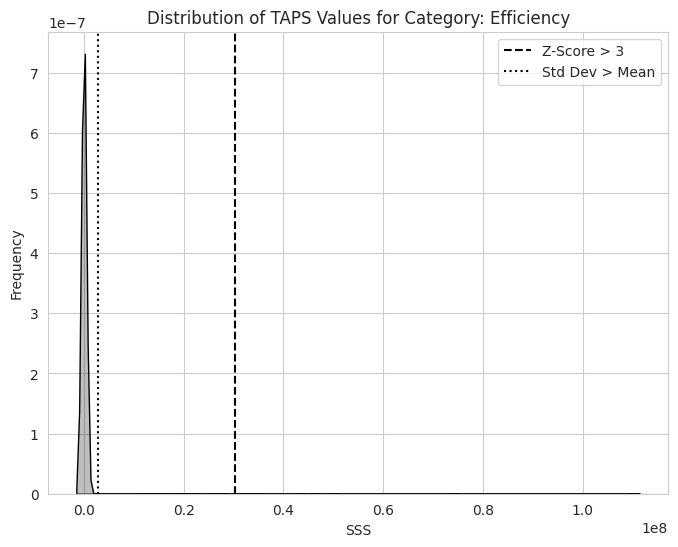

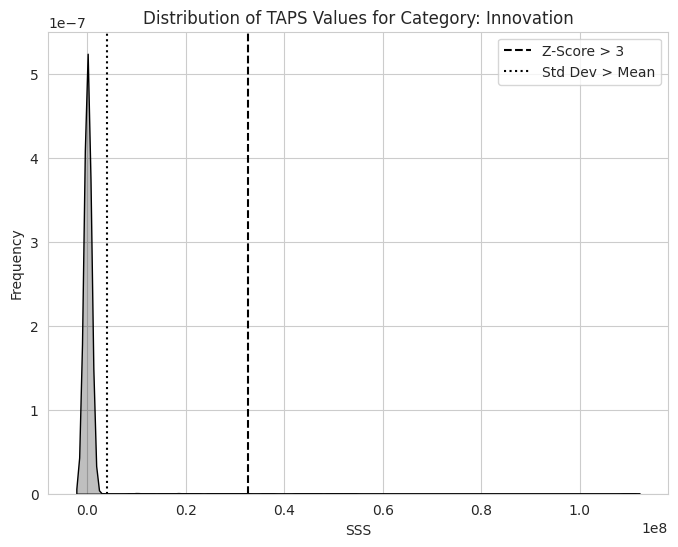

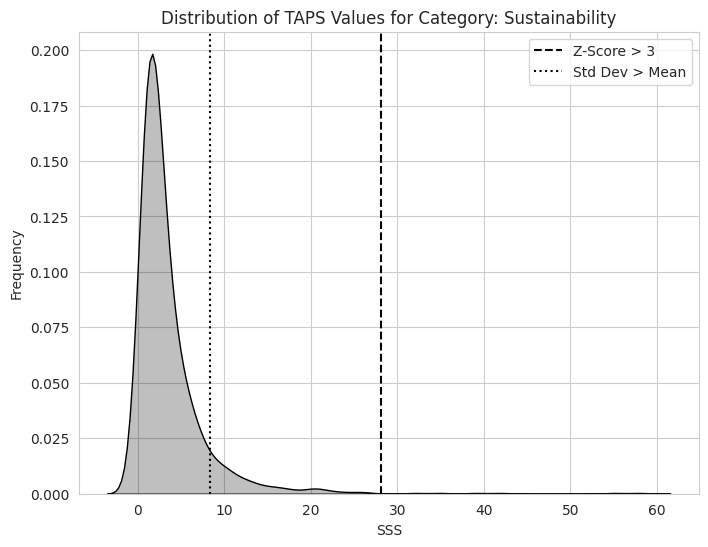

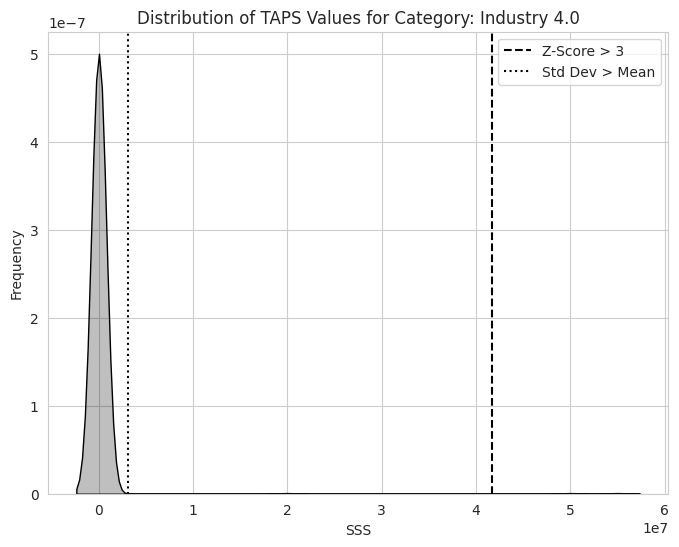

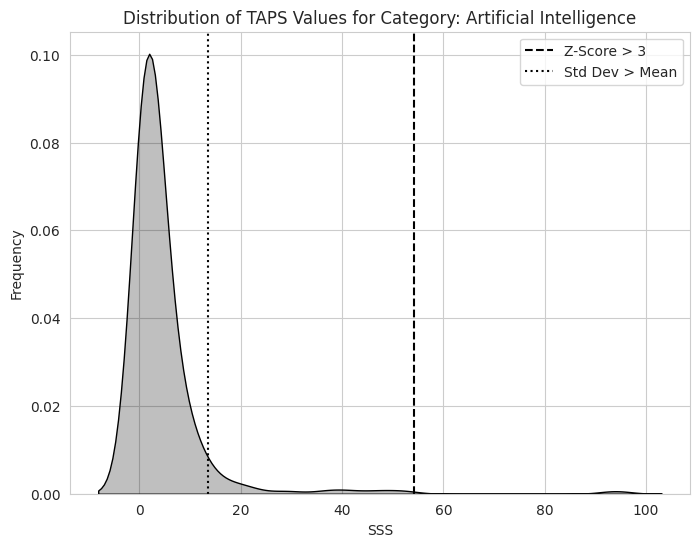

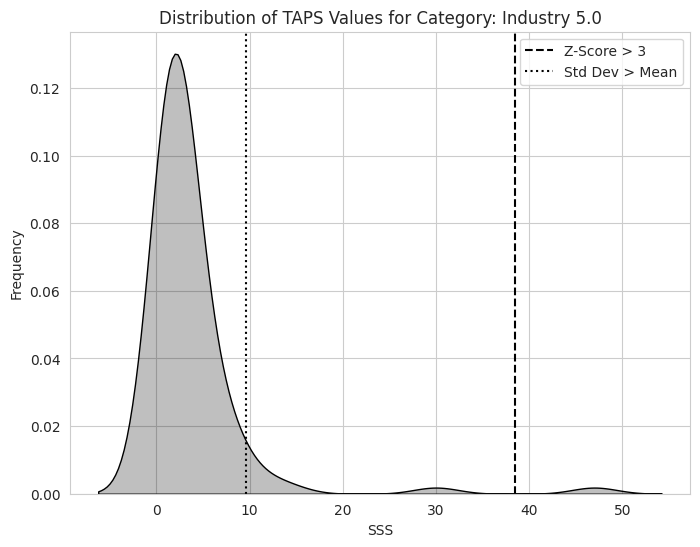

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Set seaborn style to whitegrid
sns.set_style("whitegrid")

# Step 1: Get unique categories
categories = tabela_completa['Category'].unique()

# Step 2: Plot KDE distribution for each category separately
for i, category in enumerate(categories):
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=tabela_completa[tabela_completa['Category'] == category], x='TAPS', fill=True, color='black', common_norm=False)

    # Add vertical line for z-score > 3
    plt.axvline(x=tabela_completa[(tabela_completa['Category'] == category) & (tabela_completa['TAPS_ZScore'] > 3)]['TAPS'].mean(),
                linestyle='--', label='Z-Score > 3', color='black')

    # Add vertical line for standard deviation greater than the mean
    mean_taps = tabela_completa[tabela_completa['Category'] == category]['TAPS'].mean()
    std_taps = tabela_completa[tabela_completa['Category'] == category]['TAPS'].std()
    plt.axvline(x=mean_taps + std_taps, linestyle=':', label='Std Dev > Mean', color='black')

    plt.title(f'Distribution of TAPS Values for Category: {category}')
    plt.xlabel('SSS')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)

    # Save the plot as an image
    plt.savefig(os.path.join("/content", f'{category}_plot.png'))

    plt.show()


In [85]:
# Quantity of papers with z-score > 3 for each category
print("Quantity of papers with z-score > 3 for each category:")
papers_with_zscore_gt_3 = (tabela_completa.groupby('Category')['TAPS_ZScore']
                           .apply(lambda x: (x > 3).sum()))
print(papers_with_zscore_gt_3)

# Quantity of papers with standard deviation > mean for each category
print("\nQuantity of papers with standard deviation > mean for each category:")
papers_with_std_gt_mean = (tabela_completa.groupby('Category')['TAPS_ZScore']
                           .apply(lambda x: (x > x.mean()).sum()))
print(papers_with_std_gt_mean)

# Quantity of papers with standard deviation <= mean for each category
print("\nQuantity of papers with standard deviation <= mean for each category:")
papers_with_std_leq_mean = (tabela_completa.groupby('Category')['TAPS_ZScore']
                            .apply(lambda x: (x <= x.mean()).sum()))
print(papers_with_std_leq_mean)


Quantity of papers with z-score > 3 for each category:
Category
Artificial Intelligence     5
Efficiency                 24
Industry 4.0                3
Industry 5.0                2
Innovation                 23
Sustainability             20
Name: TAPS_ZScore, dtype: int64

Quantity of papers with standard deviation > mean for each category:
Category
Artificial Intelligence     59
Efficiency                  24
Industry 4.0                 3
Industry 5.0                22
Innovation                  27
Sustainability             311
Name: TAPS_ZScore, dtype: int64

Quantity of papers with standard deviation <= mean for each category:
Category
Artificial Intelligence     168
Efficiency                 4556
Industry 4.0                684
Industry 5.0                 69
Innovation                 2600
Sustainability              715
Name: TAPS_ZScore, dtype: int64


In [61]:
# Se tudo estiver correto, continue com o código para obter os top 5 de cada categoria
x = 30

top_5_por_categoria = tabela_completa.groupby('Category').apply(lambda x: x.nlargest(5, 'TAPS')).reset_index(drop=True)
#top_5_por_categoria = (lambda tabela_completa, x: tabela_completa.sort_values(by='TAPS', ascending=False).head(x))(tabela_completa, x)

# Get the list of unique article names
unique_names = top_5_por_categoria["Article Title"].unique()

# Initialize the ID counter
i = 1

# Iterate over the unique article names
for name in unique_names:
    # Set the ID
    top_5_por_categoria.loc[top_5_por_categoria["Article Title"] == name, "ID"] = i
    i += 1

# Print the data
top_5_por_categoria

,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,Book Series Title,Book Series Subtitle,Language,Document Type,Conference Title,Conference Date,Conference Location,Conference Sponsor,Conference Host,Author Keywords,Keywords Plus,Abstract,Addresses,Affiliations,Reprint Addresses,Email Addresses,Researcher Ids,ORCIDs,Funding Orgs,Funding Name Preferred,Funding Text,Cited References,Cited Reference Count,"Times Cited, WoS Core","Times Cited, All Databases",180 Day Usage Count,Since 2013 Usage Count,Publisher_x,Publisher City,Publisher Address,ISSN_x,eISSN_x,ISBN,Journal Abbreviation,Journal ISO Abbreviation,Publication Date,Publication Year,Volume,Issue,Part Number,Supplement,Special Issue,Meeting Abstract,Start Page,End Page,Article Number,DOI,DOI Link,Book DOI,Early Access Date,Number of Pages,WoS Categories,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record,Category,Rank,Sourceid,Title,Type,Issn,SJR,SJR Best Quartile,H index,Total Docs. (2022),Total Docs. (3years),Total Refs.,Total Cites (3years),Citable Docs. (3years),Cites / Doc. (2years),Ref. / Doc.,Country,Region,Publisher_y,Coverage,Categories,Areas,eISSN_y,ISSN_y,eISSN,TAPS,TAPS_ZScore,ID
0,J,"Wirtz, J; Patterson, PG; Kunz, WH; Gruber, T; ...",NaN,NaN,NaN,"Wirtz, Jochen; Patterson, Paul G.; Kunz, Werne...",NaN,NaN,Brave new world: service robots in the frontline,JOURNAL OF SERVICE MANAGEMENT,NaN,NaN,English,Article,NaN,NaN,NaN,NaN,NaN,Consumer behaviour; Ethics; Artificial intelli...,UNIVERSAL DIMENSIONS; PROFIT CHAIN; TECHNOLOGY...,Purpose The service sector is at an inflection...,"[Wirtz, Jochen] Natl Univ Singapore, Dept Mkt,...",National University of Singapore; University o...,"Wirtz, J (autor correspondente), Natl Univ Sin...",bizwirtz@nus.edu.sg,"Gruber, Thorsten/C-3445-2013; Martins, Antje/R...","Martins, Antje/0000-0003-1534-8598; Wirtz, Joc...",NaN,NaN,NaN,NaN,87,649,652,128,681,EMERALD GROUP PUBLISHING LTD,BINGLEY,"HOWARD HOUSE, WAGON LANE, BINGLEY BD16 1WA, W ...",17575818,17575826,NaN,J SERV MANAGE,J. Serv. Manage.,NaN,2018,29,5,NaN,NaN,SI,NaN,907,931,NaN,10.1108/JOSM-04-2018-0119,http://dx.doi.org/10.1108/JOSM-04-2018-0119,NaN,NaN,25,Management,Social Science Citation Index (SSCI),Business & Economics,GZ5SN,NaN,"Green Published, Green Submitted, hybrid",NaN,NaN,2023-07-17,WOS:000449487800007,View Full Record in Web of Science,Artificial Intelligence,672,19600157901,Journal of Service Management,journal,17575818,3,Q1,77,59,127,4521,1607,123,"12,55","76,63",United Kingdom,Western Europe,Emerald Group Publishing Ltd.,2009-2022,"Business, Management and Accounting (miscellan...","Business, Management and Accounting",17575818,,NaN,94,9.936760,1.0
1,J,"Fragapane, G; Ivanov, D; Peron, M; Sgarbossa, ...",NaN,NaN,NaN,"Fragapane, Giuseppe; Ivanov, Dmitry; Peron, Mi...",NaN,NaN,Increasing flexibility and productivity in Ind...,ANNALS OF OPERATIONS RESEARCH,NaN,NaN,English,Article,NaN,NaN,NaN,NaN,NaN,Autonomous mobile robots; Artificial Intellige...,SUPPLY CHAIN; BIG DATA; GUIDED VEHICLES; SYSTE...,Manufacturing flexibility improves a firm's ab...,"[Fragapane, Giuseppe; Peron, Mirco; Sgarbossa,...",Norwegian University of Science & Technology (...,"Fragapane, G (autor correspondente), Norwegian...",giuseppe.fragapane@ntnu.no; dmitry.ivanov@hwr-...,"Sgarbossa, Fabio/AAM-2318-2020","Peron, Mirco/0000-0001-6857-8392; Strandhagen,...",DigiMat (Research Council project) [296686]; E...,DigiMat (Research Council project); European U...,The research described in this paper is partia...,NaN,74,153,153,33,145,SPRINGER,DORDRECHT,"VAN GODEWIJCKSTRAAT 30, 3311 GZ DORDRECHT, NET...",02545330,15729338,NaN,ANN OPER RES,Ann. Oper. Res.,JAN,2022,308,1-2,NaN,NaN,SI,NaN,125,143,NaN,10.1007/s10479-020-03526-7,http://dx.doi.org/10.1007/s10479-020-03526-7,NaN,FEB 2020

In [62]:
tabela_unicos = top_5_por_categoria.drop_duplicates(subset='Article Title', keep='first')
#colunas_para_dropar = ['Research Areas', 'Publication Year', 'Times Cited', 'SJR','TAPS' , 'ID']
#tabela_unicos = tabela_unicos.drop(columns=colunas_para_dropar)
tabela_unicos

,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,Book Series Title,Book Series Subtitle,Language,Document Type,Conference Title,Conference Date,Conference Location,Conference Sponsor,Conference Host,Author Keywords,Keywords Plus,Abstract,Addresses,Affiliations,Reprint Addresses,Email Addresses,Researcher Ids,ORCIDs,Funding Orgs,Funding Name Preferred,Funding Text,Cited References,Cited Reference Count,"Times Cited, WoS Core","Times Cited, All Databases",180 Day Usage Count,Since 2013 Usage Count,Publisher_x,Publisher City,Publisher Address,ISSN_x,eISSN_x,ISBN,Journal Abbreviation,Journal ISO Abbreviation,Publication Date,Publication Year,Volume,Issue,Part Number,Supplement,Special Issue,Meeting Abstract,Start Page,End Page,Article Number,DOI,DOI Link,Book DOI,Early Access Date,Number of Pages,WoS Categories,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record,Category,Rank,Sourceid,Title,Type,Issn,SJR,SJR Best Quartile,H index,Total Docs. (2022),Total Docs. (3years),Total Refs.,Total Cites (3years),Citable Docs. (3years),Cites / Doc. (2years),Ref. / Doc.,Country,Region,Publisher_y,Coverage,Categories,Areas,eISSN_y,ISSN_y,eISSN,TAPS,TAPS_ZScore,ID
0,J,"Wirtz, J; Patterson, PG; Kunz, WH; Gruber, T; ...",NaN,NaN,NaN,"Wirtz, Jochen; Patterson, Paul G.; Kunz, Werne...",NaN,NaN,Brave new world: service robots in the frontline,JOURNAL OF SERVICE MANAGEMENT,NaN,NaN,English,Article,NaN,NaN,NaN,NaN,NaN,Consumer behaviour; Ethics; Artificial intelli...,UNIVERSAL DIMENSIONS; PROFIT CHAIN; TECHNOLOGY...,Purpose The service sector is at an inflection...,"[Wirtz, Jochen] Natl Univ Singapore, Dept Mkt,...",National University of Singapore; University o...,"Wirtz, J (autor correspondente), Natl Univ Sin...",bizwirtz@nus.edu.sg,"Gruber, Thorsten/C-3445-2013; Martins, Antje/R...","Martins, Antje/0000-0003-1534-8598; Wirtz, Joc...",NaN,NaN,NaN,NaN,87,649,652,128,681,EMERALD GROUP PUBLISHING LTD,BINGLEY,"HOWARD HOUSE, WAGON LANE, BINGLEY BD16 1WA, W ...",17575818,17575826,NaN,J SERV MANAGE,J. Serv. Manage.,NaN,2018,29,5,NaN,NaN,SI,NaN,907,931,NaN,10.1108/JOSM-04-2018-0119,http://dx.doi.org/10.1108/JOSM-04-2018-0119,NaN,NaN,25,Management,Social Science Citation Index (SSCI),Business & Economics,GZ5SN,NaN,"Green Published, Green Submitted, hybrid",NaN,NaN,2023-07-17,WOS:000449487800007,View Full Record in Web of Science,Artificial Intelligence,672,19600157901,Journal of Service Management,journal,17575818,3,Q1,77,59,127,4521,1607,123,"12,55","76,63",United Kingdom,Western Europe,Emerald Group Publishing Ltd.,2009-2022,"Business, Management and Accounting (miscellan...","Business, Management and Accounting",17575818,,NaN,94,9.936760,1.0
1,J,"Fragapane, G; Ivanov, D; Peron, M; Sgarbossa, ...",NaN,NaN,NaN,"Fragapane, Giuseppe; Ivanov, Dmitry; Peron, Mi...",NaN,NaN,Increasing flexibility and productivity in Ind...,ANNALS OF OPERATIONS RESEARCH,NaN,NaN,English,Article,NaN,NaN,NaN,NaN,NaN,Autonomous mobile robots; Artificial Intellige...,SUPPLY CHAIN; BIG DATA; GUIDED VEHICLES; SYSTE...,Manufacturing flexibility improves a firm's ab...,"[Fragapane, Giuseppe; Peron, Mirco; Sgarbossa,...",Norwegian University of Science & Technology (...,"Fragapane, G (autor correspondente), Norwegian...",giuseppe.fragapane@ntnu.no; dmitry.ivanov@hwr-...,"Sgarbossa, Fabio/AAM-2318-2020","Peron, Mirco/0000-0001-6857-8392; Strandhagen,...",DigiMat (Research Council project) [296686]; E...,DigiMat (Research Council project); European U...,The research described in this paper is partia...,NaN,74,153,153,33,145,SPRINGER,DORDRECHT,"VAN GODEWIJCKSTRAAT 30, 3311 GZ DORDRECHT, NET...",02545330,15729338,NaN,ANN OPER RES,Ann. Oper. Res.,JAN,2022,308,1-2,NaN,NaN,SI,NaN,125,143,NaN,10.1007/s10479-020-03526-7,http://dx.doi.org/10.1007/s10479-020-03526-7,NaN,FEB 2020

In [63]:
!pip install pyvis